In [3]:
pip install kneed


Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [11]:
import pandas as pd

# Provide the full path to the file on your desktop as a string
file_path = "C:/Users/ishwari/Desktop/Mall_Customers.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [15]:
features, true_labels = make_blobs()

In [13]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [16]:
 true_labels[:5]

array([1, 2, 1, 1, 2])

In [18]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Assuming 'features' is your data that you want to scale
scaled_features = scaler.fit_transform(features)


In [19]:
scaled_features[:5]

array([[ 0.74226582,  0.14289085],
       [-1.3644985 ,  1.2078553 ],
       [ 0.98078877, -0.52681497],
       [ 1.14361527, -0.65899569],
       [-1.63345525,  1.50606297]])

In [21]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
)

In [22]:
 kmeans.fit(scaled_features)

C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [23]:
kmeans.inertia_

12.563151535158742

In [24]:
 kmeans.cluster_centers_

array([[ 0.59330595, -0.1056676 ],
       [-1.3912986 ,  1.31905759],
       [ 0.71411684, -0.82035723]])

In [25]:
kmeans.n_iter_

4

In [26]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 1])

In [27]:
In [13]: kmeans_kwargs = {
   ...:     "init": "random",
   ...:     "n_init": 10,
   ...:     "max_iter": 300,
   ...:     "random_state": 42,
   ...: }
   ...:
   ...: # A list holds the SSE values for each k
   ...: sse = []
   ...: for k in range(1, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(scaled_features)
   ...:     sse.append(kmeans.inertia_)

C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

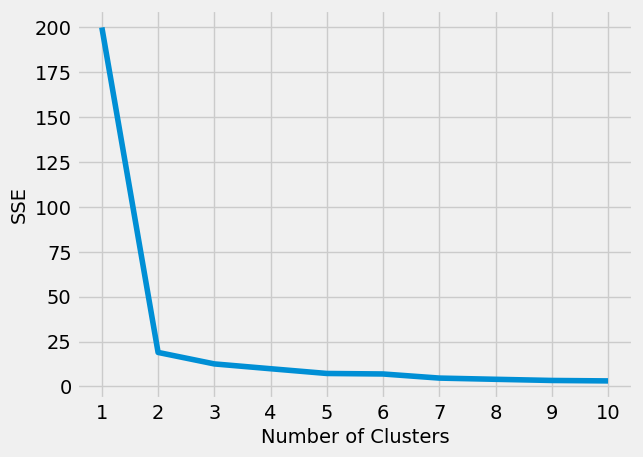

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [30]:
In [15]: kl = KneeLocator(
   ...:     range(1, 11), sse, curve="convex", direction="decreasing"
   ...: )



In [31]:

In [16]: kl.elbow

2

In [32]:
In [17]: # A list holds the silhouette coefficients for each k
   ...: silhouette_coefficients = []
   ...:
   ...: # Notice you start at 2 clusters for silhouette coefficient
   ...: for k in range(2, 11):
   ...:     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   ...:     kmeans.fit(scaled_features)
   ...:     score = silhouette_score(scaled_features, kmeans.labels_)
   ...:     silhouette_coefficients.append(score)

C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

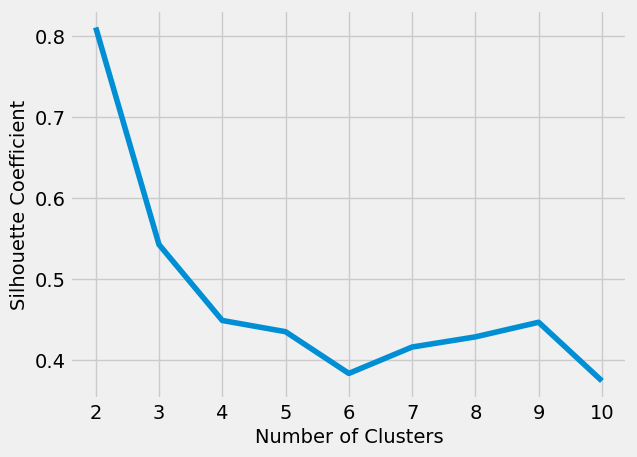

In [33]:
In [18]: plt.style.use("fivethirtyeight")
   ...: plt.plot(range(2, 11), silhouette_coefficients)
   ...: plt.xticks(range(2, 11))
   ...: plt.xlabel("Number of Clusters")
   ...: plt.ylabel("Silhouette Coefficient")
   ...: plt.show()

In [35]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [37]:
In [21]: # Instantiate k-means and dbscan algorithms
   ...: kmeans = KMeans(n_clusters=2)
   ...: dbscan = DBSCAN(eps=0.3)
   ...:
   ...: # Fit the algorithms to the features
   ...: kmeans.fit(scaled_features)
   ...: dbscan.fit(scaled_features)
   ...:
   ...: # Compute the silhouette scores for each algorithm
   ...: kmeans_silhouette = silhouette_score(
   ...:     scaled_features, kmeans.labels_
   ...: ).round(2)
   ...: dbscan_silhouette = silhouette_score(
   ...:    scaled_features, dbscan.labels_
   ...: ).round (2)

C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ishwari\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
 kmeans_silhouette

0.81

In [39]:
dbscan_silhouette

0.64

In [40]:
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)

In [41]:
round(ari_kmeans, 2)


0.56

In [42]:
round(ari_dbscan, 2)


0.52